In [209]:

# Cargar los datos desde el archivo Excel
import pandas as pd
file_path = 'Superstore Sales.xlsx'
xls = pd.ExcelFile(file_path)
df_depurado = pd.read_excel(xls, sheet_name='Dataset Depurado')

# Limpiar el dataset
df_depurado.columns = df_depurado.iloc[0]
df_depurado = df_depurado.drop(0)
df_depurado.columns = df_depurado.columns.str.strip()
df_depurado = df_depurado.loc[:, ~df_depurado.columns.duplicated()]
df_depurado_clean = df_depurado.dropna()

# Convertir tipos de datos
df_depurado_clean.loc['Order Date'] = pd.to_datetime(df_depurado_clean['Order Date'])
df_depurado_clean.loc['Sales'] = pd.to_numeric(df_depurado_clean['Sales'], errors='coerce')



## Abstract

Este proyecto explora un dataset relacionado con las ventas de una tienda minorista. Se analiza cómo varían las ventas según variables como el segmento de clientes, la región, la categoría de productos y el modo de envío. El análisis tiene como objetivo identificar patrones y proporcionar recomendaciones comerciales para mejorar la segmentación de clientes y la estrategia de productos. Se parte de la hipótesis de que los consumidores individuales y ciertos productos, como los muebles, generan mayores ingresos, mientras que la elección del modo de envío varía entre regiones y tipos de clientes.



## Preguntas e Hipótesis

1. **¿Cómo varían las ventas según las diferentes regiones y segmentos de clientes?**
   - Hipótesis: Las regiones más urbanas generarán mayores ingresos y el segmento "Consumer" tendrá un mayor volumen de ventas que el segmento "Corporate".
   
2. **¿Qué categorías de productos generan mayores ingresos en cada región?**
   - Hipótesis: Las categorías de **Furniture** y **Office Supplies** serán las que aporten más ingresos en general, con variaciones dependiendo de la región.
   
3. **¿Existen diferencias significativas en los modos de envío elegidos según las regiones o el tipo de cliente?**
   - Hipótesis: Se espera que las regiones más urbanas o los segmentos corporativos prefieran modos de envío más rápidos debido a la urgencia en los pedidos.


In [212]:

# Asegurarse de que los índices y columnas categóricas sean del tipo correcto
df_depurado_clean.index = df_depurado_clean.index.infer_objects()

# Convertir cualquier columna categórica a 'category' para evitar warnings futuros
categorical_columns = df_depurado_clean.select_dtypes(include='object').columns
df_depurado_clean[categorical_columns] = df_depurado_clean[categorical_columns].apply(lambda col: col.astype('category'))

# Generar el resumen
summary = df_depurado_clean.describe()

# Forzar la inferencia del tipo de los índices del resumen
summary.index = summary.index.infer_objects()

# Mostrar el resumen
print(summary)



0       Row ID        Order ID           Order Date            Ship Date  \
count     9800            9800                 9800                 9800   
unique    9800            4922                 1230                 1326   
top          1  CA-2018-100111  2017-09-05 00:00:00  2018-09-26 00:00:00   
freq         1              14                   38                   34   

0            Ship Mode Customer ID  Customer Name   Segment          Location  \
count             9800        9800           9800      9800              9800   
unique               4         793            793         3               628   
top     Standard Class    WB-21850  William Brown  Consumer  US-NEW-NEW-10035   
freq              5859          35             35      5101               253   

0             Country           City       State  Postal Code Region  \
count            9800           9800        9800         9800   9800   
unique              1            529          49          627      4 

In [213]:

# Análisis de valores perdidos
missing_values = df_depurado_clean.isnull().sum()
missing_values


0
Row ID           2
Order ID         2
Order Date       2
Ship Date        2
Ship Mode        2
Customer ID      2
Customer Name    2
Segment          2
Location         2
Country          2
City             2
State            2
Postal Code      2
Region           2
Product ID       2
Category         2
Sub-Category     2
Product Name     2
Sales            2
dtype: int64

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar infer_objects a columnas e índice
df_depurado_clean.columns = df_depurado_clean.columns.infer_objects()
df_depurado_clean.index = df_depurado_clean.index.infer_objects()  # Prevenir el FutureWarning

# Convertir tipos de datos
df_depurado_clean['Order Date'] = pd.to_datetime(df_depurado_clean['Order Date'])
df_depurado_clean['Sales'] = pd.to_numeric(df_depurado_clean['Sales'], errors='coerce')


In [215]:

# Estadísticas resumidas de ventas por categoría y región
sales_summary = df_depurado_clean.groupby(['Category', 'Region'], observed=False)['Sales'].describe()

print(sales_summary)


                          count           mean           std   min       25%  \
Category        Region                                                         
Furniture       Central   470.0  364115.236894  1.634714e+06  2.91  270.7125   
                East      591.0  191082.188562  4.384601e+05  2.96  119.1700   
                South     326.0  199346.563497  8.097633e+05  6.16  141.0975   
                West      691.0  235139.925239  5.929530e+05  3.48   78.6800   
Office Supplies Central  1399.0   34852.284382  1.612691e+05  0.44   31.0600   
                East     1667.0   41175.993317  2.419645e+05  0.85   24.5600   
                South     983.0   34820.597569  1.482683e+05  1.78   26.1600   
                West     1860.0   29603.481505  1.930404e+05  1.08   19.4400   
Technology      Central   408.0  165621.559975  5.489836e+05  1.98  134.9400   
                East      527.0  135572.159412  6.875606e+05  2.97  104.9100   
                South     289.0   91796.

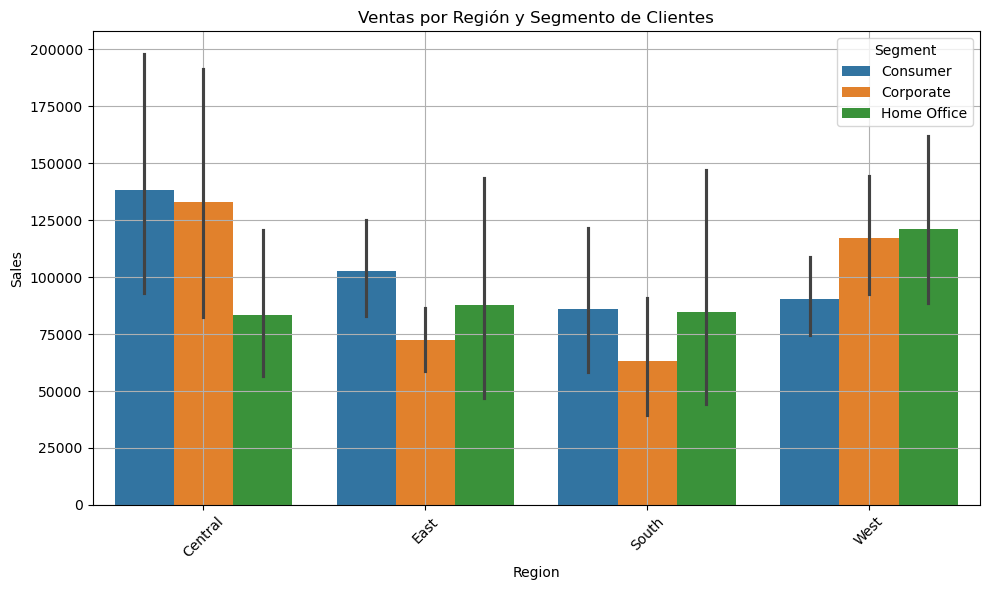

In [216]:

#  Grafico en Seaborn 1: Ventas por Región y Segmento de Clientes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_depurado_clean, x='Region', y='Sales', hue='Segment')
plt.title('Ventas por Región y Segmento de Clientes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


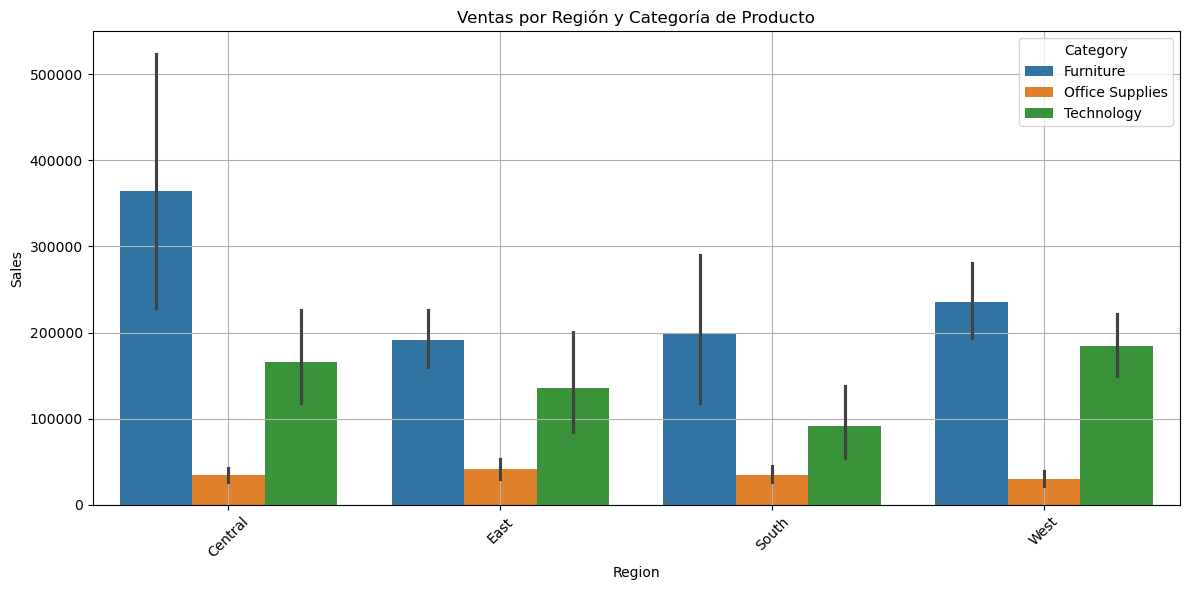

In [218]:

# Grafico en Seaborn 2: Ventas por Región y Categoría de Producto
plt.figure(figsize=(12, 6))
sns.barplot(data=df_depurado_clean, x='Region', y='Sales', hue='Category')
plt.title('Ventas por Región y Categoría de Producto')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


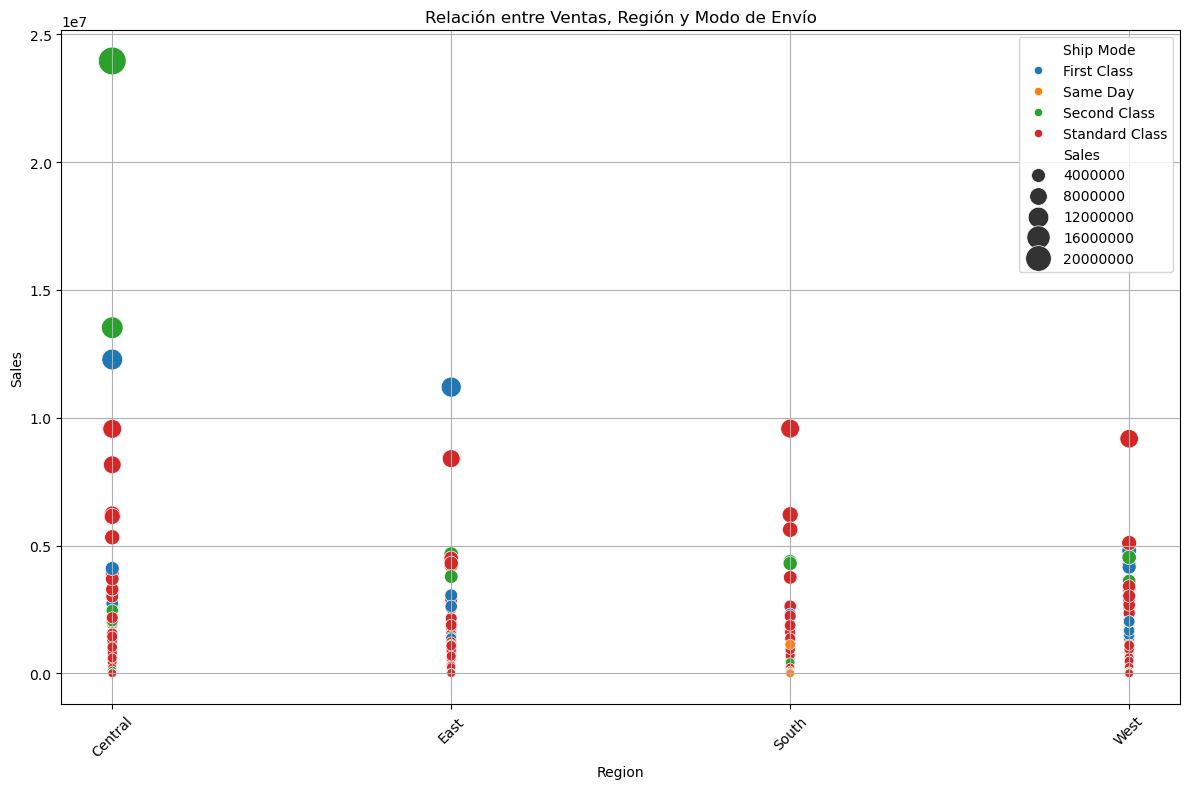

In [223]:

# Grafico en Seaborn 3: Relación entre Ventas, Región y Modo de Envío
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_depurado_clean, x='Region', y='Sales', hue='Ship Mode', size='Sales', sizes=(40, 400))
plt.title('Relación entre Ventas, Región y Modo de Envío')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


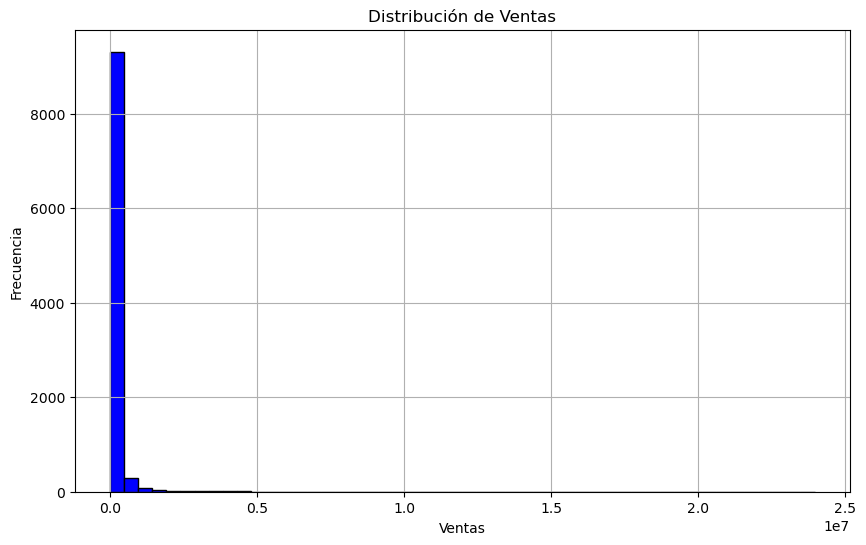

In [225]:

# Eliminar valores NaN en la columna 'Sales'
df_depurado_clean = df_depurado_clean[df_depurado_clean['Sales'].notna()]

# Grafico en Matplotlib 1: Distribución de Ventas
plt.figure(figsize=(10, 6))
plt.hist(df_depurado_clean['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


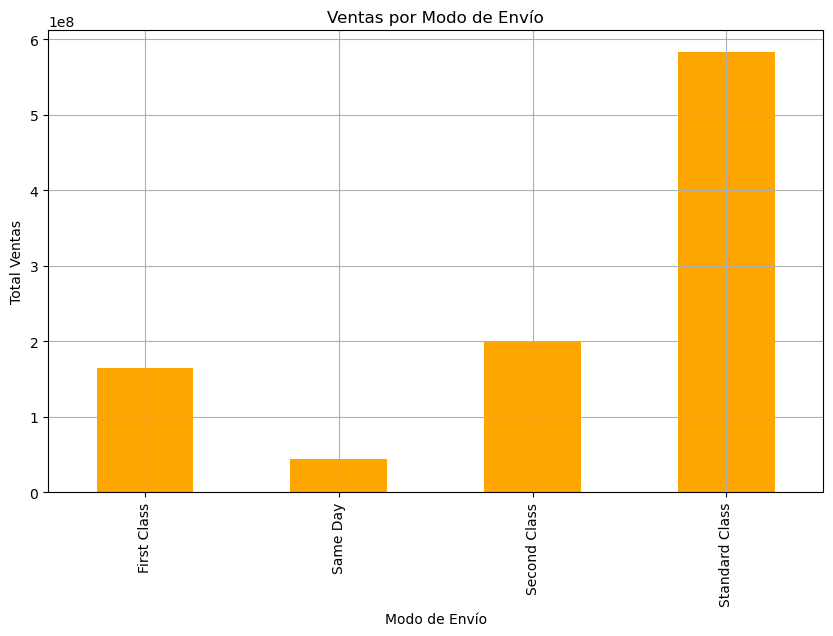

In [227]:

# Grafico en Matplotlib 2: Ventas por Modo de Envío
plt.figure(figsize=(10, 6))
df_depurado_clean.groupby('Ship Mode', observed=False)['Sales'].sum().plot(kind='bar', color='orange')
plt.title('Ventas por Modo de Envío')
plt.xlabel('Modo de Envío')
plt.ylabel('Total Ventas')
plt.grid(True)
plt.show()


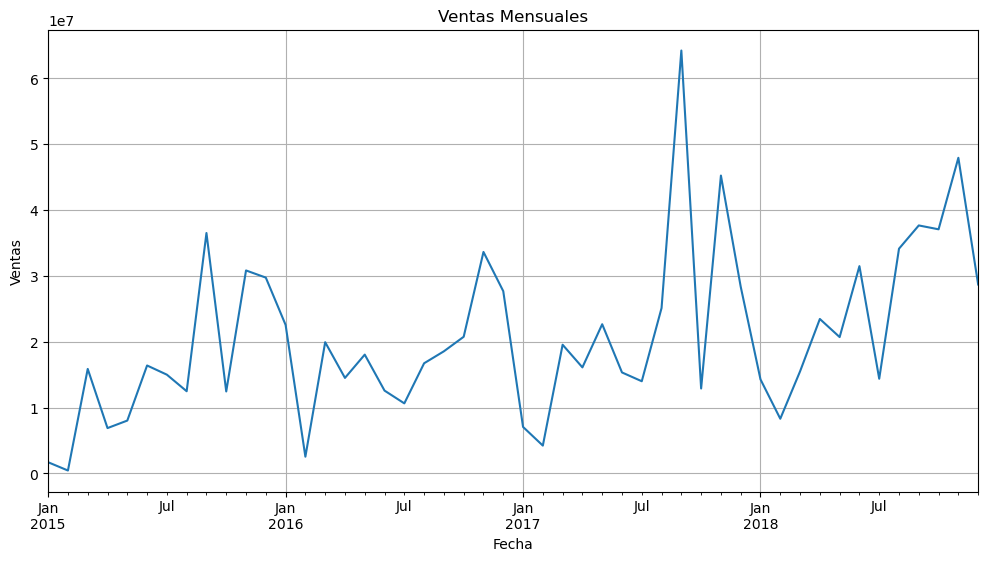

In [230]:

# Asegurarse de que la columna 'Order Date' sea de tipo datetime
df_depurado_clean['Order Date'] = pd.to_datetime(df_depurado_clean['Order Date'])

# Resampleo de las ventas por mes (fin de mes)
df_depurado_clean.set_index('Order Date')['Sales'].resample('ME').sum().plot(figsize=(12, 6))

# Grafico en matlpotlib 3:
# Añadir título y etiquetas
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()